# Midterm Skills Exam: Data Wrangling and Analysis

---

**Name**: Cuadra, Audrick Zander G.

**Section**: CPE22S3

**Submitted to**: Engr. Roman Richard

---

In this activity, you are expected to demonstrate skills learned from concluded modules. Specifically:

- Analyze data using tools such as numpy and pandas for data wrangling tasks;
- Visualize data using pandas and seaborn;
- Perform exploratory data analysis on a complex dataset.

Resources:

- Jupyter Lab / Notebook
- Dataset: https://archive-beta.ics.uci.edu/dataset/20/census+income

Submission Requirements:
- Perform data wrangling on the given dataset.
- Visualize the given dataset.
- Submit pdf of exploratory data analysis.
- Submit pdf of EDA presentation. Sample: https://aseandse.org/asean-dse-storyboard/

In [1]:
# Install the ucimlrepo package
!pip install ucimlrepo

In [2]:
# Import the dataset into your code
from ucimlrepo import fetch_ucirepo

# fetch dataset
census_income = fetch_ucirepo(id=20)

# data (as pandas dataframes)
X = census_income.data.features
y = census_income.data.targets

# metadata
print(census_income.metadata)

# variable information
print(census_income.variables)

{'uci_id': 20, 'name': 'Census Income', 'repository_url': 'https://archive.ics.uci.edu/dataset/20/census+income', 'data_url': 'https://archive.ics.uci.edu/static/public/20/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data.  Also known as Adult dataset.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5GP7S', 'creators': ['Ron Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && 

In [3]:
# import pandas and numpy
import pandas as pd
import numpy as np

# concatinating the X and y dataframe to form a single dataframe
census_df = pd.concat([X, y], axis=1)
census_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [4]:
# creating a function that detects and displays the number of duplicates in the dataframe
def countDuplicate(data):
    if data.duplicated().any():
        count = data.duplicated().sum()
        print(count)
    else:
        return "No Duplicates Found!"

In [5]:
# checking the number of duplicated
countDuplicate(census_df)

29


In [6]:
# dropping duplicates of the dataframe
census_df.drop_duplicates(census_df, inplace=True)
census_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [7]:
# confirming that all duplicates have been dropped
countDuplicate(census_df)

'No Duplicates Found!'

In [8]:
# displaying the number of nulls for each column in the dataframe
census_df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [9]:
# checking the frequency of values of each column that contains a null
census_df['workclass'].value_counts()

workclass
Private             33879
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [10]:
census_df['occupation'].value_counts()

occupation
Prof-specialty       6167
Craft-repair         6107
Exec-managerial      6084
Adm-clerical         5608
Sales                5504
Other-service        4919
Machine-op-inspct    3019
Transport-moving     2355
Handlers-cleaners    2071
?                    1843
Farming-fishing      1487
Tech-support         1445
Protective-serv       983
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64

In [11]:
census_df['native-country'].value_counts()

native-country
United-States                 43810
Mexico                          947
?                               582
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [12]:
census_df['income'].value_counts()

income
<=50K     24698
<=50K.    12430
>50K       7839
>50K.      3846
Name: count, dtype: int64

In [13]:
census_df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [14]:
# replacing all the '?' values with the most frequent data in each columns
# since the value frequency in 'occupation is close to one another, we will use 'ffill' for the missing values
# we will replace '?' to NaN values in order to meet the requirement of 'ffill' method
census_df['workclass'].replace('?', 'Private', inplace=True)
census_df['workclass'].fillna('Private', inplace=True)
census_df['native-country'].replace('?', 'United-States', inplace=True)
census_df['native-country'].fillna('United-States', inplace=True)
census_df['occupation'].replace('?', np.NaN, inplace=True)

In [15]:
census_df.replace('<=50K.', '<=50K', inplace=True)
census_df.replace('>50K.', '>50K', inplace=True)

In [16]:
# using 'ffill' method to supply the NaN values
census_df = census_df.assign(
    occupation = lambda x: x['occupation'].fillna(method='ffill')
)

In [17]:
census_df['workclass'].value_counts()

workclass
Private             36678
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [18]:
census_df['native-country'].value_counts()

native-country
United-States                 44666
Mexico                          947
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [19]:
census_df['occupation'].value_counts()

occupation
Prof-specialty       6553
Craft-repair         6504
Exec-managerial      6456
Adm-clerical         5932
Sales                5813
Other-service        5199
Machine-op-inspct    3223
Transport-moving     2507
Handlers-cleaners    2222
Farming-fishing      1567
Tech-support         1530
Protective-serv      1031
Priv-house-serv       259
Armed-Forces           17
Name: count, dtype: int64

In [20]:
# checks if there are still remaining nulls in the dataframe
census_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [21]:
# checking all the categorical values
census_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48813 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48813 non-null  int64 
 1   workclass       48813 non-null  object
 2   fnlwgt          48813 non-null  int64 
 3   education       48813 non-null  object
 4   education-num   48813 non-null  int64 
 5   marital-status  48813 non-null  object
 6   occupation      48813 non-null  object
 7   relationship    48813 non-null  object
 8   race            48813 non-null  object
 9   sex             48813 non-null  object
 10  capital-gain    48813 non-null  int64 
 11  capital-loss    48813 non-null  int64 
 12  hours-per-week  48813 non-null  int64 
 13  native-country  48813 non-null  object
 14  income          48813 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [22]:
# This is to allow the access for the dataframe in which the int conversion hasn't occurred
census_cat = census_df.copy()

In [23]:
# transforming categorical values into numerical values is needed
# since education already has an education-num, dropping 'education' would suffice
census_df.drop(columns=['education'], inplace=True)
census_df

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,Private,321403,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [24]:
# creating a function that transform categorical values into numerical values
def preprocessing(data, catlist):
    if data[catlist].dtypes == 'object':
        categorical_values = data[catlist].unique()
        range_values = range(1, len(categorical_values)+1)
        map = dict(zip(categorical_values, range_values))
        print(f"{catlist}:", map)
        data[catlist] = data[catlist].map(map)
    return data
for i in census_df.select_dtypes(include=['object']).columns:
    preprocessing(census_df, i)

workclass: {'State-gov': 1, 'Self-emp-not-inc': 2, 'Private': 3, 'Federal-gov': 4, 'Local-gov': 5, 'Self-emp-inc': 6, 'Without-pay': 7, 'Never-worked': 8}
marital-status: {'Never-married': 1, 'Married-civ-spouse': 2, 'Divorced': 3, 'Married-spouse-absent': 4, 'Separated': 5, 'Married-AF-spouse': 6, 'Widowed': 7}
occupation: {'Adm-clerical': 1, 'Exec-managerial': 2, 'Handlers-cleaners': 3, 'Prof-specialty': 4, 'Other-service': 5, 'Sales': 6, 'Craft-repair': 7, 'Transport-moving': 8, 'Farming-fishing': 9, 'Machine-op-inspct': 10, 'Tech-support': 11, 'Protective-serv': 12, 'Armed-Forces': 13, 'Priv-house-serv': 14}
relationship: {'Not-in-family': 1, 'Husband': 2, 'Wife': 3, 'Own-child': 4, 'Unmarried': 5, 'Other-relative': 6}
race: {'White': 1, 'Black': 2, 'Asian-Pac-Islander': 3, 'Amer-Indian-Eskimo': 4, 'Other': 5}
sex: {'Male': 1, 'Female': 2}
native-country: {'United-States': 1, 'Cuba': 2, 'Jamaica': 3, 'India': 4, 'Mexico': 5, 'South': 6, 'Puerto-Rico': 7, 'Honduras': 8, 'England': 9

In [25]:
census_df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,1,77516,13,1,1,1,1,1,2174,0,40,1,1
1,50,2,83311,13,2,2,2,1,1,0,0,13,1,1
2,38,3,215646,9,3,3,1,1,1,0,0,40,1,1
3,53,3,234721,7,2,3,2,2,1,0,0,40,1,1
4,28,3,338409,13,2,4,3,2,2,0,0,40,2,1


<Axes: >

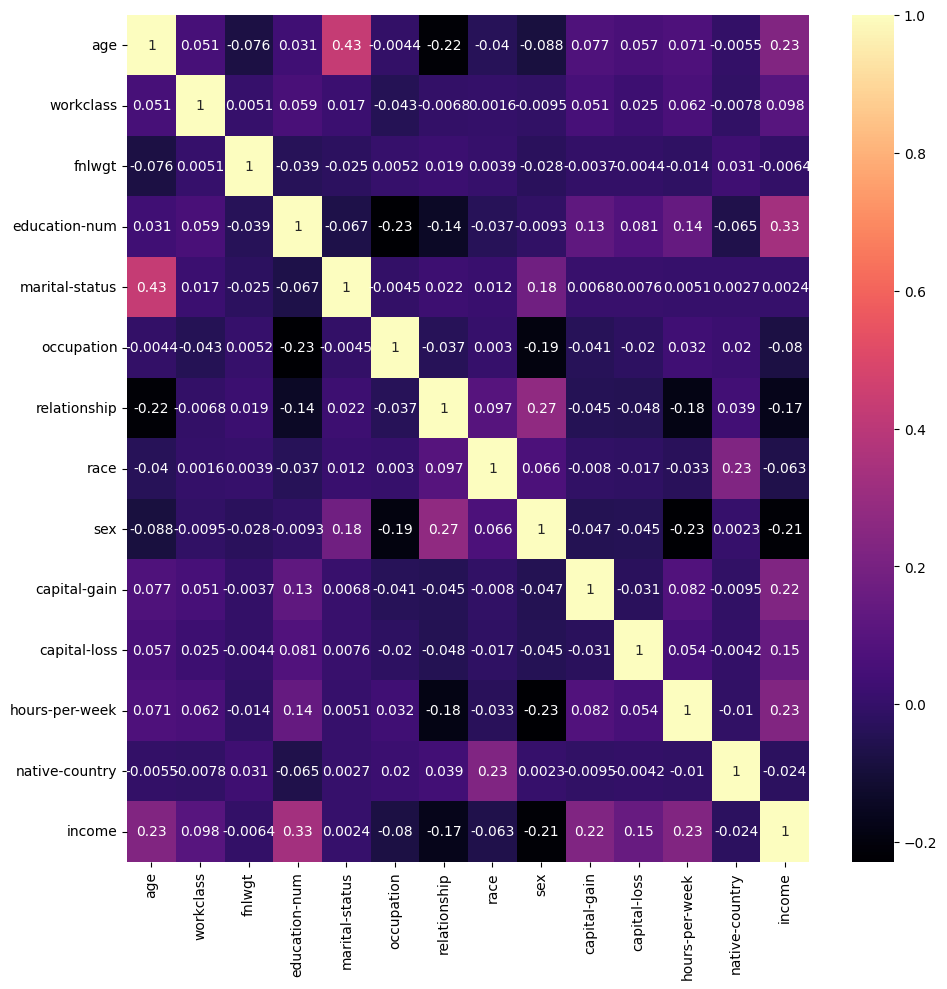

In [26]:
# creating a heatmap to check the correlation of each categories between one another
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 11))
sns.heatmap(census_df.corr(), annot=True, cmap='magma')

In [39]:
# checking the descriptive statistics of the aggregated age and workclass
# used a sample of 300 to make the visualization cleaner
sampl_cen = census_cat.sample(300, random_state=0)
sampl_cen.groupby('workclass')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
workclass,,,,,,,,
Federal-gov,13.0,43.846154,11.639345,30.0,34.00,42.0,48.0,64.0
Local-gov,15.0,41.133333,13.907175,22.0,32.50,38.0,47.5,80.0
Private,230.0,38.265217,14.849584,17.0,26.00,35.5,48.0,77.0
Self-emp-inc,10.0,42.600000,16.647990,19.0,30.25,41.0,51.0,70.0
Self-emp-not-inc,17.0,47.411765,11.790138,31.0,37.00,47.0,56.0,72.0
State-gov,15.0,31.066667,9.027471,19.0,24.50,27.0,41.0,46.0


<ipython-input-38-4ebd03fa27da>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90)
<ipython-input-38-4ebd03fa27da>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=10)


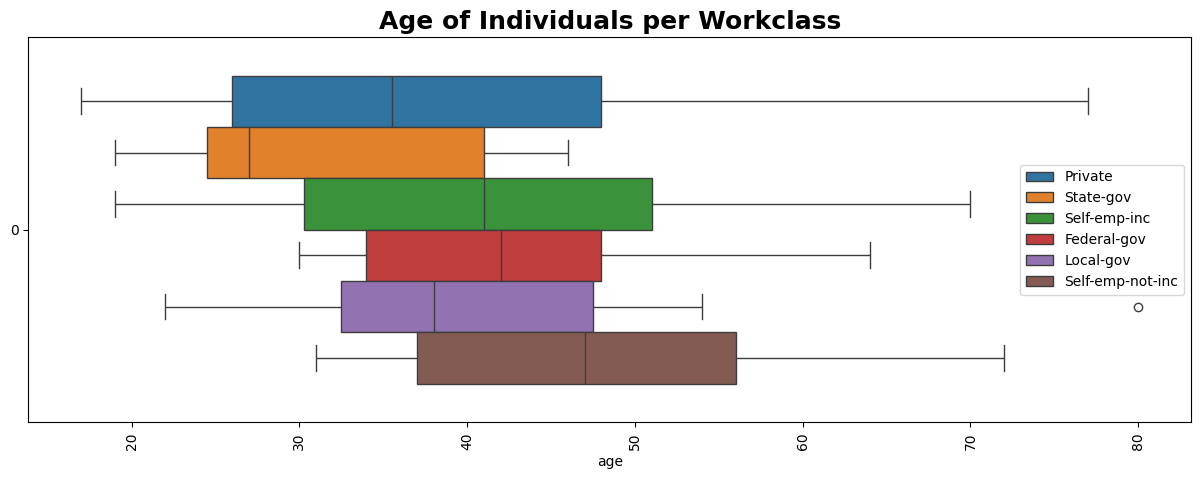

In [38]:
# plotting of the age and workclass with the use of boxplot
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x=sampl_cen['age'], hue=sampl_cen['workclass'], ax=ax)
ax.set_title('Age of Individuals per Workclass', fontsize=18, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90)
ax.set_yticklabels(ax.get_yticks(), fontsize=10)
ax.legend(fontsize=10)

<ipython-input-41-3bdbb27cbf36>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=16)


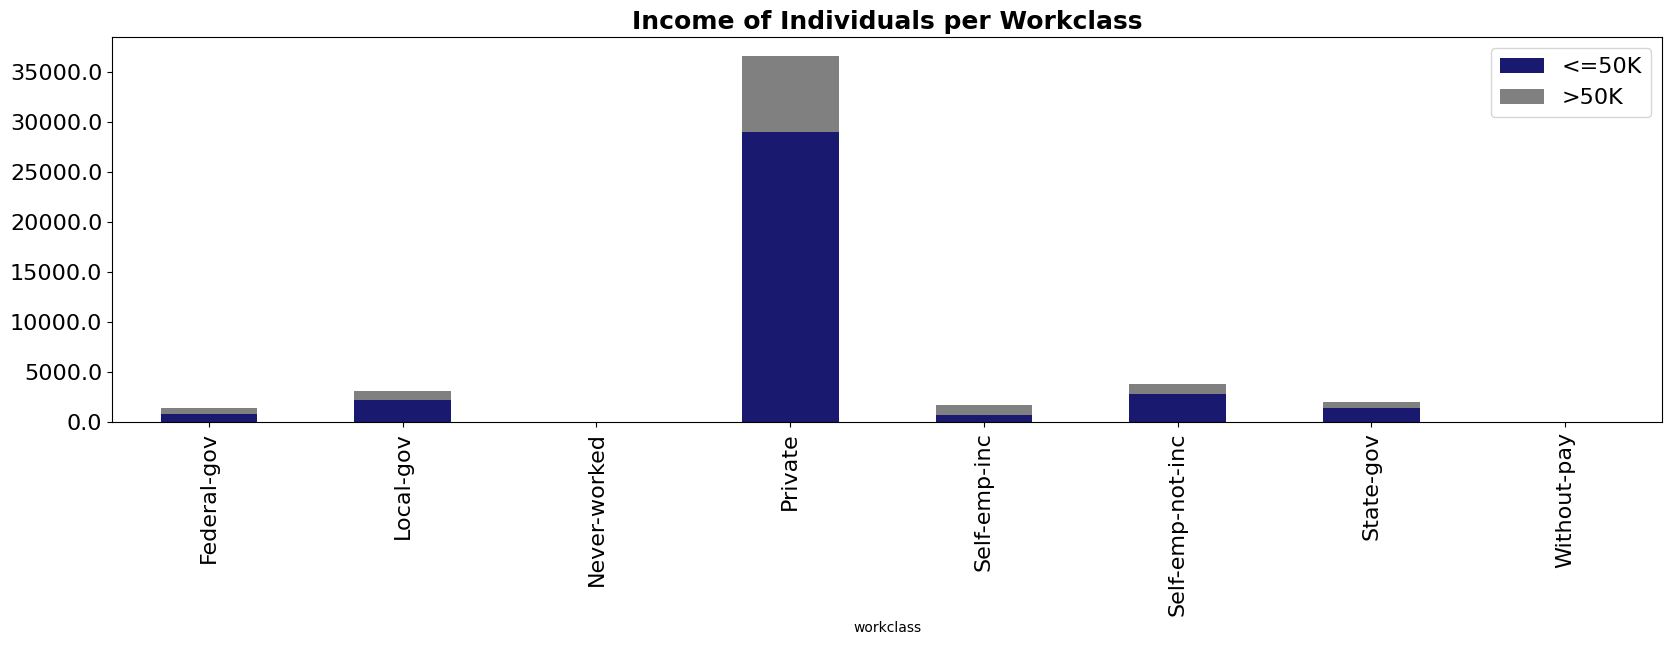

In [41]:
# plotting of the Income of each individuals per workclass with the use of stacked bar graphs
crosstab = pd.crosstab(census_cat['workclass'], census_cat['income'])
fig, ax = plt.subplots(figsize=(20,5))
crosstab.plot(kind='bar', stacked=True, ax=ax, color=['midnightblue', 'gray'])
ax.set_title('Income of Individuals per Workclass', fontsize=18, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, rotation=90)
ax.set_yticklabels(ax.get_yticks(), fontsize=16)
ax.legend(fontsize=16)

In [42]:
# checking the descriptive statistics of the aggregated hours-per-week and workclass
sampl_cen.groupby('workclass')['hours-per-week'].describe()

,count,mean,std,min,25%,50%,75%,max
workclass,,,,,,,,
Federal-gov,13.0,41.307692,3.682948,40.0,40.0,40.0,40.00,53.0
Local-gov,15.0,43.066667,15.912559,20.0,40.0,40.0,50.00,80.0
Private,230.0,40.221739,13.107498,6.0,40.0,40.0,45.00,99.0
Self-emp-inc,10.0,46.900000,8.265726,35.0,40.0,47.0,53.75,60.0
Self-emp-not-inc,17.0,47.882353,17.898612,20.0,40.0,48.0,55.00,98.0
State-gov,15.0,34.533333,18.310289,10.0,17.5,40.0,40.00,80.0


<ipython-input-43-cc3f5f7e37b6>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=sampl_cen['hours-per-week'], hue=sampl_cen['workclass'], ci=None, ax=ax)
<ipython-input-43-cc3f5f7e37b6>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90)
<ipython-input-43-cc3f5f7e37b6>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=10)


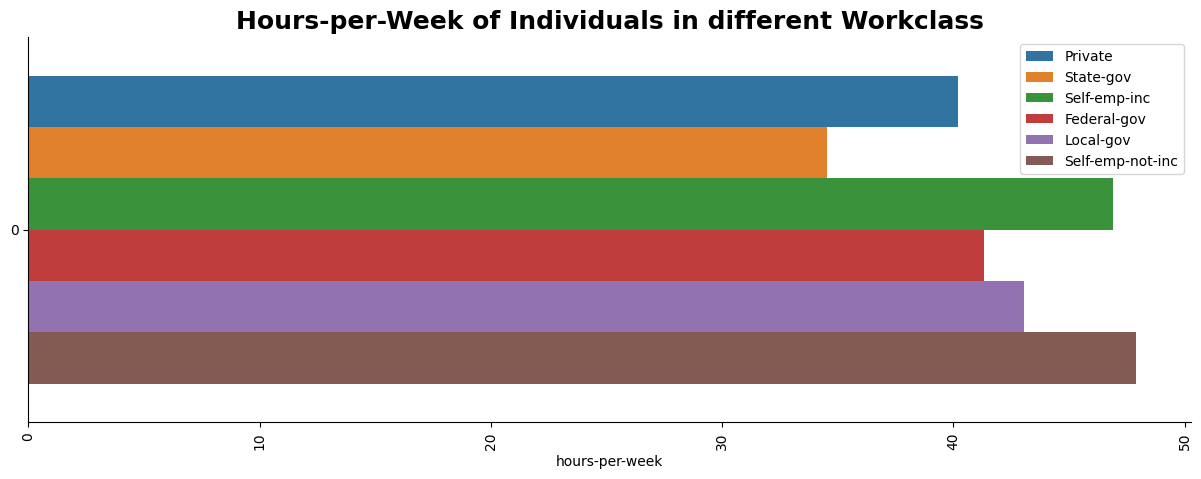

In [43]:
# plotting of the hours-per-week of each individuals per workclass with the use of barplot
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x=sampl_cen['hours-per-week'], hue=sampl_cen['workclass'], ci=None, ax=ax)
ax.set_title('Hours-per-Week of Individuals in different Workclass', fontsize=18, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90)
ax.set_yticklabels(ax.get_yticks(), fontsize=10)
ax.legend(fontsize=10)
sns.despine()

In [32]:
# checking the frequency of values in each education levels
census_cat['education'].value_counts()

education
HS-grad         15777
Some-college    10869
Bachelors        8020
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              656
Doctorate         594
5th-6th           508
1st-4th           245
Preschool          82
Name: count, dtype: int64

<ipython-input-37-4e7c8eb87c14>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=16)


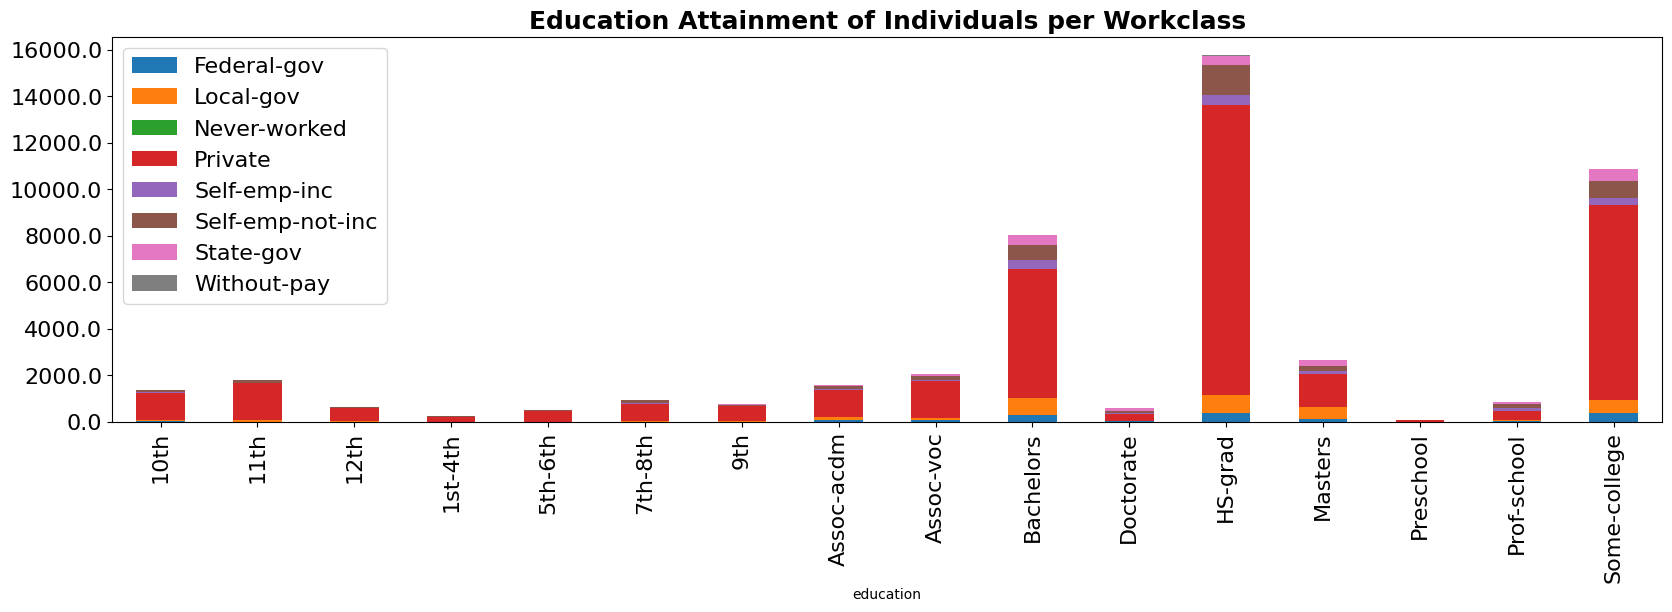

In [37]:
# plotting of the education attainment of each individuals per workclass with the use of stacked bar graphs
crosstab = pd.crosstab(census_cat['education'], census_cat['workclass'])
fig, ax = plt.subplots(figsize=(20,5))
crosstab.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Education Attainment of Individuals per Workclass', fontsize=18, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, rotation=90)
ax.set_yticklabels(ax.get_yticks(), fontsize=16)
ax.legend(fontsize=16)